<a href="https://colab.research.google.com/github/radhika004/CustomerSupportTickets/blob/main/Algorithmic_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Integration with Google Sheets

In [3]:
Sheet_link="https://docs.google.com/spreadsheets/d/1QBhwbKvbEaWZUuY6RpHLGw-VpcEAJvoTMBjMr-3dol0/edit?usp=sharing"

In [5]:
import gspread



from google.oauth2.service_account import Credentials

scopes = [
    'https://www.googleapis.com/auth/spreadsheets',
    'https://www.googleapis.com/auth/drive'
]

credentials = Credentials.from_service_account_file('/customer-446707-2a36db4f6900.json',scopes=scopes)

gc = gspread.authorize(credentials)

sh = gc.open_by_key("1QBhwbKvbEaWZUuY6RpHLGw-VpcEAJvoTMBjMr-3dol0")

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# read sheet
import pandas as pd

worksheet = sh.sheet1 # or sh.get_worksheet(0) for the first sheet

# Get all values from the worksheet
data = worksheet.get_all_values()

# Convert to DataFrame
df_sheets = pd.DataFrame(data[1:], columns=data[0])  # First row is header

df_sheets

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,1001352387736,Urgent: Critical impact on enterprise network ...,"Dear Customer Support Team, We are experiencin...",Subject: Re: Urgent: Critical impact on enterp...,Incident,Technical Support,high,en,IT Services,Service Outage,Network Issue,Urgent Issue,Technical Support,Problem Resolution,Critical Failure,System Crash,Service Disruption,
1,1004699418379,Intermittent Cursor Freezing Issue on Dell XPS,"Dear Customer Support,<br><br>I hope this mess...","Dear <name>,\n\n\nThank you for reaching out r...",Incident,Product Support,low,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Problem Resolution,Urgent Issue,Service Recovery,Documentation Request,,
2,1006966905046,Dringend: Unterstützung für die Datenwiederher...,"Hallo, wir haben severe Datenverluste in MySQL...","Hallo, vielen Dank, dass Sie uns kontaktiert h...",Incident,Technical Support,high,de,IT Services,Data Breach,Backup Restore,Technical Support,Urgent Issue,Software Bug,Problem Resolution,,,
3,1009231330404,Anfrage zu den MacBook Air M1 Funktionen,"Sehr geehrtes Kundenserviceteam,\n\n\nich hoff...","Sehr geehrter <name>,\n\n\nvielen Dank für Ihr...",Request,Sales and Pre-Sales,low,de,Tech Online Store,Customer Service,Product Support,Sales Inquiry,Technical Guidance,Warranty Claim,General Inquiry,,,
4,1024440081041,Solicitação de Assistência com Erro de Instala...,"Caro Suporte ao Cliente,\n\n\nEstou enfrentand...","Caro <name>,\n\n\nObrigado por entrar em conta...",Problem,Technical Support,medium,pt,IT Services,Technical Support,Software Bug,Urgent Issue,Problem Resolution,Product Support,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1561,9974052734733,Immediate Assistance Requested,"Dear Customer Support Team,\n\n\nI am contacti...",Subject: Re: Immediate Assistance Requested\n\...,Request,Technical Support,high,en,IT Consulting Firm,IT Support,Urgent Issue,Network Issue,Problem Resolution,Technical Guidance,Service Recovery,Performance Tuning,,
1562,9976062913094,Demande de consultation de serveur,"Cher support client,\n\n\nJe vous écris pour d...","Cher <name>,\n\n\nMerci de nous avoir contacté...",Request,Customer Service,medium,fr,IT Services,IT Support,Technical Support,System Maintenance,Software Bug,Technical Guidance,,,,
1563,9980051846510,Solicitação de Troca de Impressora,"Caro Suporte da Loja Online Tech,\n\n\nEstou e...","Caro <name>,\n\n\nObrigado por entrar em conta...",Request,Returns and Exchanges,medium,pt,Tech Online Store,Returns and Exchanges,Product Support,Warranty Claim,Order Issue,Service Recovery,,,,
1564,9982406203212,Problèmes de facturation concernant les servic...,"Cher Service Client,\n\n\nJe vous écris pour p...","Cher <name>,\n\n\nMerci de nous avoir contacté...",Problem,Billing and Payments,high,fr,IT Services,Billing Issue,Customer Service,Account Assistance,Problem Resolution,,,,,


In [8]:
!pip install "gspread==6.1.3"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: gspread
    Found existing installation: gspread 6.0.2
    Uninstalling gspread-6.0.2:
      Successfully uninstalled gspread-6.0.2


In [9]:
!pip install gspread google-auth


In [10]:
csv_file = '/customer_support.csv'
df = pd.read_csv(csv_file)

In [11]:
df.fillna('', inplace=True)
df.replace([float('inf'), float('-inf')], '', inplace=True)

<ipython-input-11-14f6802ab3b9>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('', inplace=True)


In [12]:

data = [df.columns.tolist()] + df.values.tolist()
worksheet = sh.sheet1
worksheet.clear()
worksheet.update(data)


{'spreadsheetId': '1QBhwbKvbEaWZUuY6RpHLGw-VpcEAJvoTMBjMr-3dol0',
 'updatedRange': 'Sheet1!A1:R1567',
 'updatedRows': 1567,
 'updatedColumns': 18,
 'updatedCells': 28206}

In [13]:
df.head()

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,1001352387736,Urgent: Critical impact on enterprise network ...,"Dear Customer Support Team, We are experiencin...",Subject: Re: Urgent: Critical impact on enterp...,Incident,Technical Support,high,en,IT Services,Service Outage,Network Issue,Urgent Issue,Technical Support,Problem Resolution,Critical Failure,System Crash,Service Disruption,
1,1004699418379,Intermittent Cursor Freezing Issue on Dell XPS,"Dear Customer Support,<br><br>I hope this mess...","Dear <name>,\n\n\nThank you for reaching out r...",Incident,Product Support,low,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Problem Resolution,Urgent Issue,Service Recovery,Documentation Request,,
2,1006966905046,Dringend: Unterstützung für die Datenwiederher...,"Hallo, wir haben severe Datenverluste in MySQL...","Hallo, vielen Dank, dass Sie uns kontaktiert h...",Incident,Technical Support,high,de,IT Services,Data Breach,Backup Restore,Technical Support,Urgent Issue,Software Bug,Problem Resolution,,,
3,1009231330404,Anfrage zu den MacBook Air M1 Funktionen,"Sehr geehrtes Kundenserviceteam,\n\n\nich hoff...","Sehr geehrter <name>,\n\n\nvielen Dank für Ihr...",Request,Sales and Pre-Sales,low,de,Tech Online Store,Customer Service,Product Support,Sales Inquiry,Technical Guidance,Warranty Claim,General Inquiry,,,
4,1024440081041,Solicitação de Assistência com Erro de Instala...,"Caro Suporte ao Cliente,\n\n\nEstou enfrentand...","Caro <name>,\n\n\nObrigado por entrar em conta...",Problem,Technical Support,medium,pt,IT Services,Technical Support,Software Bug,Urgent Issue,Problem Resolution,Product Support,,,,


In [14]:
df.shape

(1566, 18)

In [15]:
df['language'].value_counts()

,count
language,
de,397
es,379
en,339
pt,229
fr,222


In [16]:
# prompt: td idf for 'subject' column in table form

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['subject'])

# Convert the TF-IDF matrix to a DataFrame
tfidf_df2 = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

tfidf_df2

# Here output gives insight that every subject is unique and doesn't repeat across the rows

,11,13,19c,20,2024,23,30,365,3755,4760,...,änderungsantrag,écart,échange,écran,élevée,überhitzt,überhitzung,überhitzungsproblem,überhitzungsprobleme,überprüfung
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.357832,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.33229,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1561,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1562,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1563,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1564,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
#  tf idf for answer  column

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['answer'])

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

tfidf_df

,10,11,12345678,13,15,18,1811528,19c,20,2021,...,übersehene,übersehenes,übersicht,übertragung,überwachen,überwacht,überwachung,überwachungsfähigkeiten,üblichen,œuvre
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.072893,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.066198,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1561,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1562,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1563,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1564,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Filter the DataFrame for rows where the 'language' column is 'en'
filtered_df = df[df['language'] == 'en']

# Select the desired columns ('subject', 'answer', 'body', 'business_type') from the filtered DataFrame
selected_columns = filtered_df[['subject', 'answer', 'body', 'business_type']]

# Print or use the selected_columns DataFrame
selected_columns

,subject,answer,body,business_type
0,Urgent: Critical impact on enterprise network ...,Subject: Re: Urgent: Critical impact on enterp...,"Dear Customer Support Team, We are experiencin...",IT Services
1,Intermittent Cursor Freezing Issue on Dell XPS,"Dear <name>,\n\n\nThank you for reaching out r...","Dear Customer Support,<br><br>I hope this mess...",Tech Online Store
5,Exchange Request for Malfunctioning Dell XPS 13,"Dear <name>,\n\n\nThank you for reaching out a...","Dear Tech Online Store Customer Support,\n\n\n...",Tech Online Store
6,Request for Server Administration Assistance,Subject: Re: Request for Server Administration...,"Dear IT Services Customer Support, \n\n\nWe ar...",IT Services
7,Immediate Attention Required: AWS Outage Concern,"Hello <name>,\n\n\nWe appreciate you informing...","Greetings IT Services Customer Support,\n\n\nI...",IT Services
...,...,...,...,...
1517,AWS Authentication Issues,"Dear <name>,\n\n\nThank you for reaching out a...","Dear IT Services Support Team, \n\n\nI am writ...",IT Services
1528,Immediate Assistance Needed: Issues with Serve...,"Dear <name>,\n\n\nThank you for reaching out t...","Dear Customer Support Team,\n\n\nI am contacti...",IT Services
1536,High Priority: Recurring Network Disruptions,Subject: Re: High Priority: Recurring Network ...,"Hello Customer Support Team,\n\n\nOur Cisco Ro...",IT Services
1537,Request for Support,Of course! Hold down the Wi-Fi button until th...,I would appreciate help setting up my Canon PI...,Tech Online Store


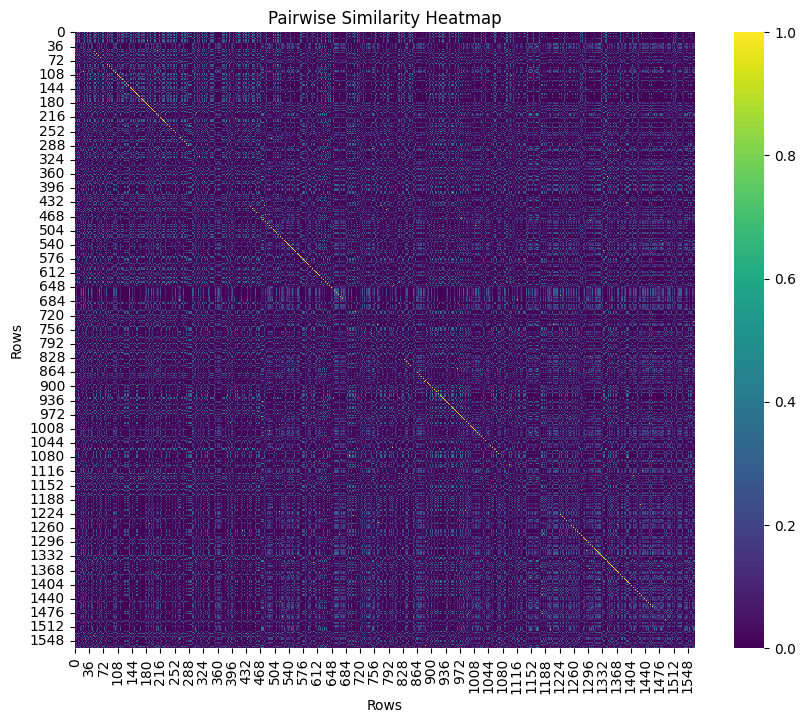

In [26]:
# prompt: calculate pairwise similarity for every row and make a heatmap of nrows x nrows

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

# Assuming 'tfidf_df' is your TF-IDF matrix DataFrame (from the previous code)
# Calculate the cosine similarity matrix
similarity_matrix = cosine_similarity(tfidf_df)

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(similarity_matrix, annot=False, cmap='viridis', fmt=".2f")  # Use a colormap and format
plt.title('Pairwise Similarity Heatmap')
plt.xlabel('Rows')
plt.ylabel('Rows')
plt.show()

In [27]:
# prompt: use pca on 'tfidf_answers' and get top 3 pca Principal Components for selected_columns

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'tfidf_df' is your TF-IDF matrix DataFrame and 'selected_columns' is your DataFrame with selected columns
# Scale the data
scaler = StandardScaler()
scaled_tfidf_answers = scaler.fit_transform(tfidf_df)

# Apply PCA
pca = PCA(n_components=3)  # Specify the number of components (top 3 in this case)
pca_result = pca.fit_transform(scaled_tfidf_answers)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])

# Concatenate the PCA components with the selected columns
final_df = pd.concat([selected_columns.reset_index(drop=True), pca_df], axis=1)

# Now 'final_df' contains the top 3 PCA components along with your selected columns
print(final_df.head())

                                             subject  \
0  Urgent: Critical impact on enterprise network ...   
1     Intermittent Cursor Freezing Issue on Dell XPS   
2    Exchange Request for Malfunctioning Dell XPS 13   
3       Request for Server Administration Assistance   
4   Immediate Attention Required: AWS Outage Concern   

                                              answer  \
0  Subject: Re: Urgent: Critical impact on enterp...   
1  Dear <name>,\n\n\nThank you for reaching out r...   
2  Dear <name>,\n\n\nThank you for reaching out a...   
3  Subject: Re: Request for Server Administration...   
4  Hello <name>,\n\n\nWe appreciate you informing...   

                                                body      business_type  \
0  Dear Customer Support Team, We are experiencin...        IT Services   
1  Dear Customer Support,<br><br>I hope this mess...  Tech Online Store   
2  Dear Tech Online Store Customer Support,\n\n\n...  Tech Online Store   
3  Dear IT Services Custom

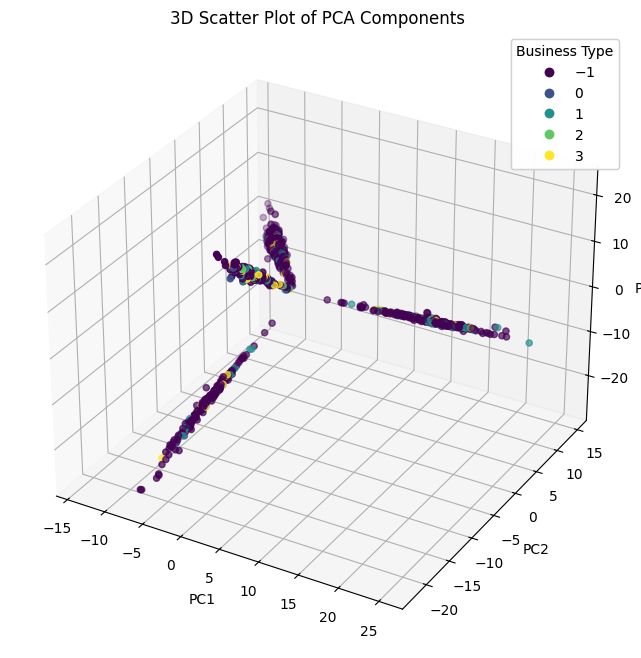

In [28]:
# prompt:  make a 3d scatter plot for pc1 , 2 and 3 using sns

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'final_df' is your DataFrame with 'PC1', 'PC2', and 'PC3' columns
# Create the 3D scatter plot
plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
scatter = ax.scatter(final_df['PC1'], final_df['PC2'], final_df['PC3'], c=final_df['business_type'].astype('category').cat.codes, cmap='viridis') # color by business type

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Scatter Plot of PCA Components')

# Add a legend
legend1 = ax.legend(*scatter.legend_elements(), loc="best", title="Business Type")
ax.add_artist(legend1)

plt.show()

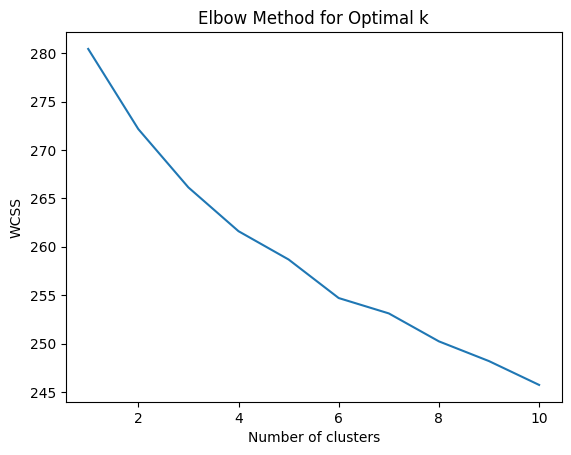

In [19]:
# prompt: use selected_columns dataframe and apply elbow method for answer column

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Assuming 'selected_columns' DataFrame is already defined as in the previous code

# Apply TF-IDF vectorization to the 'answer' column
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(selected_columns['answer'])

# Calculate the within-cluster sum of squares (WCSS) for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(tfidf_matrix)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
#optimal clusters k=4 from below plot

In [20]:
#cluster out similar issues with k means
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import pandas as pd

# Tf idf
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(selected_columns['answer'])

# optimal k=4
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
selected_columns['cluster'] = kmeans.fit_predict(tfidf_matrix)

# Reduce dimensionality to 3D using pca
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(tfidf_matrix.toarray())

# Add the reduced dimensions to the DataFrame
selected_columns['x'] = reduced_data[:, 0]
selected_columns['y'] = reduced_data[:, 1]
selected_columns['z'] = reduced_data[:, 2]

# Create the 3D scatter plot using Plotly
fig = go.Figure()

for cluster_label in range(4):  # Loop through each cluster
    cluster_data = selected_columns[selected_columns['cluster'] == cluster_label]
    fig.add_trace(go.Scatter3d(
        x=cluster_data['x'],  # Use the reduced x-coordinates
        y=cluster_data['y'],  # Use the reduced y-coordinates
        z=cluster_data['z'],  # Use the reduced z-coordinates
        mode='markers',
        marker=dict(size=5),  # Adjust marker size
        name=f'Cluster {cluster_label}'  # Label each cluster
    ))

# 3d plot
fig.update_layout(
    title='KMeans Clustering (3D)',
    scene=dict(
        xaxis_title='PC 1',
        yaxis_title='PC 2',
        zaxis_title='PC 3'
    )
)


fig.show()


<ipython-input-20-a57fa2897796>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['cluster'] = kmeans.fit_predict(tfidf_matrix)
<ipython-input-20-a57fa2897796>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['x'] = reduced_data[:, 0]
<ipython-input-20-a57fa2897796>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [30]:


# Assuming 'selected_columns' DataFrame is already defined as in the previous code
selected_columns['answer_labels'] = selected_columns['cluster'].astype(str)

# Display the updated DataFrame
selected_columns

<ipython-input-30-5e86ffdccfc6>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,subject,answer,body,business_type,cluster,x,y,z,answer_labels
0,Urgent: Critical impact on enterprise network ...,Subject: Re: Urgent: Critical impact on enterp...,"Dear Customer Support Team, We are experiencin...",IT Services,3,-0.164792,0.271271,-0.005863,3
1,Intermittent Cursor Freezing Issue on Dell XPS,"Dear <name>,\n\n\nThank you for reaching out r...","Dear Customer Support,<br><br>I hope this mess...",Tech Online Store,0,0.098753,-0.050534,-0.220364,0
5,Exchange Request for Malfunctioning Dell XPS 13,"Dear <name>,\n\n\nThank you for reaching out a...","Dear Tech Online Store Customer Support,\n\n\n...",Tech Online Store,0,0.009905,-0.048767,-0.111924,0
6,Request for Server Administration Assistance,Subject: Re: Request for Server Administration...,"Dear IT Services Customer Support, \n\n\nWe ar...",IT Services,2,-0.175423,-0.036599,0.059671,2
7,Immediate Attention Required: AWS Outage Concern,"Hello <name>,\n\n\nWe appreciate you informing...","Greetings IT Services Customer Support,\n\n\nI...",IT Services,3,-0.313189,0.129638,0.100054,3
...,...,...,...,...,...,...,...,...,...
1517,AWS Authentication Issues,"Dear <name>,\n\n\nThank you for reaching out a...","Dear IT Services Support Team, \n\n\nI am writ...",IT Services,3,-0.119877,0.012383,0.070936,3
1528,Immediate Assistance Needed: Issues with Serve...,"Dear <name>,\n\n\nThank you for reaching out t...","Dear Customer Support Team,\n\n\nI am contacti...",IT Services,3,-0.147042,0.088750,0.016138,3
1536,High Priority: Recurring Network Disruptions,Subject: Re: High Priority: Recurring Network ...,"Hello Customer Support Team,\n\n\nOur Cisco Ro...",IT Services,0,0.021232,0.185553,-0.009085,0
1537,Request for Support,Of course! Hold down the Wi-Fi button until th...,I would appreciate help setting up my Canon PI...,Tech Online Store,1,0.334075,-0.010282,0.180888,1


In [31]:
value_count for answer_label

selected_columns['answer_labels'].value_counts()

,count
answer_labels,
0,140
3,105
2,66
1,28


In [51]:
#data belongs to each cluster

for cluster_label in sorted(selected_columns['cluster'].unique()):
    print(f"\nData for Cluster {cluster_label}:")
    # Filter rows belonging to the current cluster
    cluster_data = selected_columns[selected_columns['cluster'] == cluster_label]
    print(cluster_data)




Data for Cluster 0:
                                                subject  \
1        Intermittent Cursor Freezing Issue on Dell XPS   
5       Exchange Request for Malfunctioning Dell XPS 13   
11                      Bug Report: UI Bug in React App   
20             Issues Setting Up AWS EC2 Security Group   
39    Urgent: Cisco Router ISR4331 Network Connectiv...   
...                                                 ...   
1330  Seeking Assistance: Router Leading to Network ...   
1354   Alert: User Interface Issue in React Application   
1364  Immediate Support Needed: Touchscreen Non-Resp...   
1423  High Priority: Recurrent Network Disconnection...   
1536       High Priority: Recurring Network Disruptions   

                                                 answer  \
1     Dear <name>,\n\n\nThank you for reaching out r...   
5     Dear <name>,\n\n\nThank you for reaching out a...   
11    Hello,\n\n\nThank you for reaching out to repo...   
20    Dear <name>,\n\n\nThank you 

In [21]:
# saved each cluster data in csv file
for cluster_label in sorted(selected_columns['cluster'].unique()):
    cluster_data = selected_columns[selected_columns['cluster'] == cluster_label]
    cluster_data.to_csv(f'cluster_{cluster_label}.csv', index=False)
    print(f"Cluster {cluster_label} data saved to 'cluster_{cluster_label}.csv'")


Cluster 0 data saved to 'cluster_0.csv'
Cluster 1 data saved to 'cluster_1.csv'
Cluster 2 data saved to 'cluster_2.csv'
Cluster 3 data saved to 'cluster_3.csv'


In [22]:
# no. of unique subjects
# Count the occurrences of each subject

subject_counts = df['subject'].value_counts()

# Check if all subjects occur only once
all_unique = all(count == 1 for count in subject_counts)

# Print the result and subject counts
if all_unique:
    print("Every subject is unique.")
    print(subject_counts)
else:
    print("Not all subjects are unique.")
subject_counts
# here we got every subject is unique and no repeatation is there

Every subject is unique.
subject
Urgent: Critical impact on enterprise network connectivity                        1
Urgente: Se requiere resolución inmediata para el tiempo de inactividad de AWS    1
Problemas de conectividad intermitente en ISR4331                                 1
Abrechnungsdifferenz                                                              1
Solicitud de intercambio de impresora                                             1
                                                                                 ..
Request for Cost-Effective AWS Management Solutions                               1
Critical: Problem with AWS Deployment                                             1
Asistencia para Problemas de Arranque                                             1
Antrag auf Änderungen im AWS Management Dashboard                                 1
Nouvelle configuration de projet Jira                                             1
Name: count, Length: 1566, dtype: int64


,count
subject,
Urgent: Critical impact on enterprise network connectivity,1
Urgente: Se requiere resolución inmediata para el tiempo de inactividad de AWS,1
Problemas de conectividad intermitente en ISR4331,1
Abrechnungsdifferenz,1
Solicitud de intercambio de impresora,1
...,...
Request for Cost-Effective AWS Management Solutions,1
Critical: Problem with AWS Deployment,1
Asistencia para Problemas de Arranque,1


From above analysis every issue is unique and there is no repeatation in the issues also they are not closely related to each other only their categories are same like tecnical support, product support.

In [23]:

# If there are similar answers or not

answer_counts = selected_columns['answer'].value_counts()

if answer_counts.iloc[0] == 1:
    print("No repeatation in answer")
else:
    print("Similar answers and its count:")
answer_counts

No repeatation in answer


,count
answer,
"Subject: Re: Urgent: Critical impact on enterprise network connectivity\n\n\nDear <name>,\n\n\nThank you for reaching out to us regarding the critical outage affecting your Cisco Router ISR4331.\n\n\nWe understand the urgency and impact of this issue on your operations. Our technical support team is prioritizing your case and will promptly begin diagnosing the problem to facilitate a quick resolution.\n\n\nPlease ensure all relevant technical logs are available for our team to access, which will assist in expediting the diagnostic process. We will maintain close communication and provide updates as our investigation proceeds.\n\n\nYour patience and cooperation are greatly appreciated, and we're committed to resolving this matter as swiftly as possible.\n\n\nBest regards,\n\n\nCustomer Support Team",1
"Dear <name>,\n\n\nThank you for reaching out regarding the billing discrepancies with your AWS services. We understand the importance of accurate billing and will prioritize a thorough review of your account <acc_num>.\n\n\nWe will investigate the charges and usage discrepancies you've mentioned and provide you with a detailed clarification as soon as possible. Please allow us some time to examine the data.\n\n\nIn the meantime, if you have any further information or questions, feel free to reach out via this email or at <tel_num>.\n\n\nWe appreciate your patience and understanding.\n\n\nBest regards,\nCustomer Support Team",1
"Subject: Network Connectivity Assistance\n\n\nDear <name>,\n\n\nThank you for reaching out to us regarding the connectivity issues with your Cisco Router ISR4331. We understand how critical this is to your operations.\n\n\nTo assist in resolving this promptly, please try the following steps if feasible:\n\n\n1. Ensure the router firmware is up-to-date.\n2. Verify that there are no known service outages in your area that could affect connectivity.\n3. Check your settings for any recent changes that might affect device performance.\n\n\nIf the issue persists, we recommend scheduling a session with one of our technical specialists. We can arrange for a specialist to assist you remotely or onsite, depending on your preference and urgency of the situation.\n\n\nPlease confirm a suitable time for a specialist to contact you. Meanwhile, don’t hesitate to contact us at <tel_num> or via email for any further support you might need.\n\n\nWe will prioritize your request to resolve the connectivity issues effectively and promptly.\n\n\nThank you for your patience and understanding.\n\n\nBest regards,\nCustomer Support Team",1
"Dear <name>,\n\n\nWe appreciate you getting in touch. To resolve the issue with connecting to the PostgreSQL database, please verify the following:\n\n\n1. Make sure the database server is operational and reachable.\n2. Check the connection credentials.\n3. Review any network configuration and firewall settings that might affect connectivity.\n4. Ensure that your application version is compatible with PostgreSQL.\n\n\nAs the next step, please provide any error messages or logs that you are receiving to aid in diagnosing the issue further. We are ready to assist you in resolving this matter quickly.\n\n\nBest regards,\nSupport Team",1
"Dear <name>,\n\n\nThank you for reaching out regarding the paper jams with your HP DeskJet 3755. Below are a few troubleshooting steps you can follow:\n\n\n1. Ensure paper is loaded correctly and not exceeding the tray's capacity.\n2. Check for any overlooked debris or pieces of torn paper inside the printer.\n3. Use the HP Smart app or the printer's control panel to execute a cleaning and alignment process.\n4. Update your printer's firmware via the HP website as there might be improvements addressing your issue.\n\n\nIn case the problem persists, please connect with us to explore repair or replacement options if your warranty is still active. \n\n\nFeel free to contact us should you need further assistance.\n\n\nBest regards,\nCustomer Support Tea

In [68]:
# checked value count of each requires column
# here we can see
# 1.most occured issue category is "technical support"
import pandas as pd

columns_to_check = ['type', 'queue', 'priority', 'language', 'business_type', 'tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5', 'tag_6', 'tag_7', 'tag_8', 'tag_9']

for column in columns_to_check:
  if column in df_sheets.columns:
    print(f"Value counts for column '{column}':")
    print(df_sheets[column].value_counts())
    print("-" * 20) #separator
  else:
    print(f"Column '{column}' not found in the DataFrame.")

Value counts for column 'type':
type
Incident    663
Request     468
Problem     292
Change      143
Name: count, dtype: int64
--------------------
Value counts for column 'queue':
queue
Technical Support                  589
Product Support                    288
Customer Service                   234
IT Support                         179
Billing and Payments               117
Sales and Pre-Sales                 49
Returns and Exchanges               44
Service Outages and Maintenance     44
General Inquiry                     13
Human Resources                      9
Name: count, dtype: int64
--------------------
Value counts for column 'priority':
priority
high      788
medium    572
low       206
Name: count, dtype: int64
--------------------
Value counts for column 'language':
language
de    397
es    379
en    339
pt    229
fr    222
Name: count, dtype: int64
--------------------
Value counts for column 'business_type':
business_type
IT Services                     748
Tech Onli

From above analysis most reccured issue are from technical support